# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [30]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [31]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [32]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


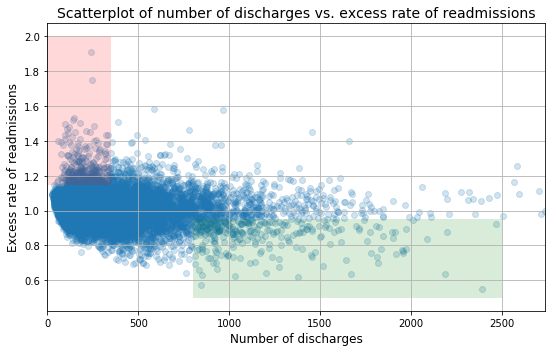

In [33]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

## Analysis of Preliminary Report

Before making any comments on the preliminary report, it helps to analyse the DataFrame ourselves and construct visualisations and inferences from it.

In [52]:
df = clean_hospital_read_df
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,Size
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013,0
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013,0
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013,0
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013,0
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013,0


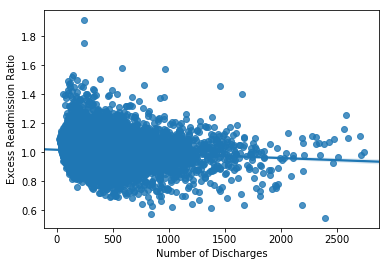

In [35]:
# Keep Number of Discharges below 3000 as there are very few datapoints 
# beyond that range and can be considered as outliers.

sns.regplot(y="Excess Readmission Ratio", x="Number of Discharges", data=df[df['Number of Discharges'] < 3000])

From the scatterplot, we can see that there is a very weak negative correlation between the Excess Readmission Ratio and the Number of Discharges. The correlation is not strong enough to warrant any direct conclusions. To get a quantitative estimate of the correlation, we calculate the r_value.

In [36]:
df2 = df['Excess Readmission Ratio'].isnull()
df2 = df[~df2]
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['Number of Discharges'], df2['Excess Readmission Ratio'])

r_value

-0.097397943510793519

Another easier way of calculating correlation is by invoking the corr() method of the dataframe. The additional advantage of this is that it gives us a quantified estimate of how each variable is correlated with every other variable in the dataframe.

In [37]:
df2.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


The r value obtained is 0.09739 which implies a very weak negative correlation. The conclusion that there is a significant correlation between hospital capacity (number of discharges) and readmission rates is therefore, wrong and misleading.

### Comments on Initial Observation based on Plot Above

I largely disagree with the initial observations made by the report.

Firstly, the correlation between excess readmission ratio and hospital size is extremely weak. It is not logical to come to a conclusion that the rate of readmissions is trending down with increasing number of discharges. The value of r is too small to give this claim any merit.

Also, there are very few large hospitals in the sample. It is entirely possible that the lower readmission rates in these hospitals happened by chance and not due to some quantifiable, correlated factors.

The second and the third observations are mostly based on the first one and hence do not have too much merit. Also, it can be clearly seen from the scatterplot that there are considerable amount of datapoints which have low hospital capacity and low readmission ratio. The same logic applies to the large hospitals as well. There are a considerable amount of datapoints that suggest the existence of large hospitals with readmission ratio greater than 1.

In other words, these two quantities are almost uncorrelated and therefore the **initial observations are misleading and false.**

### Comments on Statistics Calculated

The first step is to check the correctness of the stattistics reported. This is done belows.

In [38]:
large_df = df[df['Number of Discharges'] > 1000]
large_mean = large_df['Excess Readmission Ratio'].mean()
large_prop = (sum(large_df['Excess Readmission Ratio'] > 1)/len(large_df)) * 100

large_mean, large_prop

(0.97833542116630667, 44.492440604751621)

In [39]:
small_df = df[df['Number of Discharges'] < 100]
small_mean = small_df['Excess Readmission Ratio'].mean()
small_prop = (sum(small_df['Excess Readmission Ratio'] > 1)/len(small_df)) * 100

small_mean, small_prop

(1.0226183501683501, 59.180457052797472)

The statistics computed by the report are correct but are insignificant as they summarise the data for very few samples. There are extremely few hospitals with capacity less than 100 or greater than a 1000. Therefore, the statistics reported over here does not have too much of a significance to derive conclusions from.

### Comments on Conclusion and Regulatory Policy Recommendation

We have already established the fact that the correlation between the aforementioned quantities is extremely weak. In fact, it would be more accurate to assume no correlation than a significant (> 0.5) correlation.

The first conclusion is therefore false.

Since the second conclusion is based on the truth of the first, we cannot accept this conclusion too. The second conclusion is therefore unproved and misleading.

Finally, the recommendations made are based on the premise that the conclusions are true. Therefore, they cannot be accepted at face value and need to be re-examined with better conclusions and hypothesis testing. This is done in the next section.

## Analysis of the Data Provided

Before forming and testing a hypothesis, it is important that we visualise the data to see if we can discover some noticeable trends. We want to see the factors that reduce the excess readmission ratio among hospitals. As a first step, let us divide the data samples into two groups: large hospitals and small hospitals.

To arrive at the cutoff, a reasonable metric to obtain would be the median.

In [40]:
df['Number of Discharges'].median()

280.0

Moving forward, for the sake of our analysis we will assume the following:

* **Large Hospitals**: Number of discharges greater than or equal to 280.
* **Small Hospitals**: Number of discharges less than 280.

(1.0005412607944733, 0.10041638665438418)

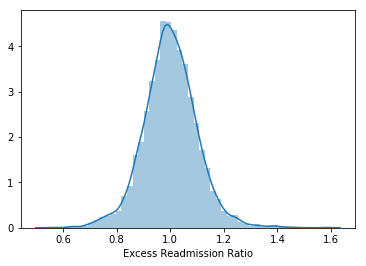

In [41]:
large_df = df[df['Number of Discharges'] >= 280]
large_ratio = large_df['Excess Readmission Ratio']
large_mean = large_ratio.mean()
large_std = large_ratio.std()

sns.distplot(large_ratio)
large_mean, large_std

(1.0145675661468372, 0.081915416788431616)

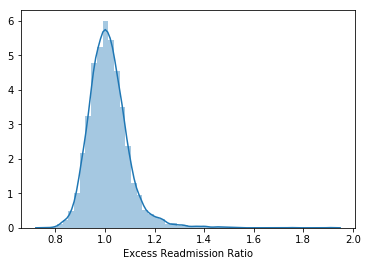

In [42]:
small_df = df[df['Number of Discharges'] < 280]
mask = small_df['Excess Readmission Ratio'].isnull()
small_df = small_df[~mask]

small_ratio = small_df['Excess Readmission Ratio']
small_mean = small_ratio.mean()
small_std = small_ratio.std()

sns.distplot(small_ratio)
small_mean, small_std

We have plotted the histograms and calculated the mean and standard deviation of the excess admission ratio for small and large hospitals. We find that there is a difference in the values for small and large hospitals. But is this value statisitcally significant?

This can be answered with a hypothesis test.

## Hypothesis test

We want find out if there is a difference in mean of the excess readmission ratio for small and large hospitals. The statistical significance of the difference in the sampled distrbution can be checked using hypothesis testing.

Assume, significance level $\alpha$ = 0.01

To conduct the hypothesis test, the following are defined:
* **Null Hypothesis:** The true mean excess readmission ratio for small and large hospitals are the same
* **Alternate Hypothesis:** The true mean excess readmission ratio for small and large hospitals are not the same

We assume the null hypothesis to be true to conduct this analysis.

In [55]:
h0_mean_diff = 0
mean_diff = large_mean - small_mean
sigma_diff = np.sqrt((large_std**2)/len(large_ratio)  + (small_std**2)/len(small_ratio))
mean_diff, sigma_diff

(-0.014026305352363932, 0.001708010961322766)

In [56]:
z = (mean_diff - h0_mean_diff) / sigma_diff
z

-8.2120698695641181

In [57]:
p = stats.norm.cdf(z) * 2
p

2.174076979522786e-16

The value of p obtained is almost 0. This implies that the null hypothesis should be rejected. We can conclude with reasonable confidence that the true mean excess readmission ratio of large and small hospitals are not the same and there is a statistically significant difference between them.

## Statistical Significance and Practical Significance

The result obtained is statistically significant as we rejected the null hypothesis for statistical significance level $\alpha$=0.01

Although there is a statistically significant difference between the means of the two sizes of hospital, we cannot conclude that the same is practically significant too. Let us check the range under which 99.7% (or 3 standard deviations) of the samples fall under.

In [46]:
large_range = large_mean - 3*large_std, large_mean + 3*large_std
small_range = small_mean - 3*small_std, small_mean + 3*small_std

print("Range for large hospitals: " + str(large_range))
print("Range for small hospitals: "  + str(small_range))

Range for large hospitals: (0.69929210083132065, 1.3017904207576259)
Range for small hospitals: (0.76882131578154234, 1.2603138165121321)


As can be seen above, the ranges within which 99.7% of the samples fall are pretty close to each other, practically speaking.

Therefore, although the result is statistically significant, it is not practically significant to warrant policies based on it. My suggestion to the client would be to look for other features that are more strongly correlated to the excess admission ratio and formulate policies based on modifying the strongly correlated feature.

## Scatterplot

An important advantage of using a scatterplot is that is allows us to visualize the correlation between two variables. In the scatterplot constructed above, it can be clearly seen that there is a very weak (almost non-existent) negative correlation between hospital capacity and excess admission ratio.

However, scatterplots have their disadvantages. In this case, there was a large amount of overplotting which led to the preliminary reported coming up with incorrect and misleading conclusions.

## Alternative Visualisations: Barplots

An interesting visualisation that could give us valuable insights into the data is the barplot. In the figure below, we have divided the data up into 20 groups (based on percentile) and plotted the mean of the excess readmission ratio of each group.

(0.8, 1.05)

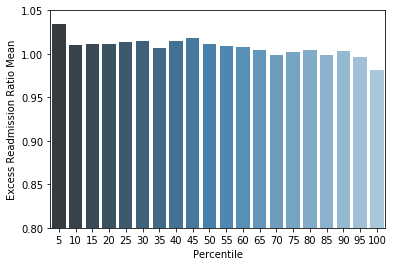

In [54]:
df['Size'] = df['Number of Discharges'].apply(lambda x: 1 if x >= 280 else 0)

mask = df['Excess Readmission Ratio'].isnull()
df3 = df[~mask]

df3 = df3.sort_values('Number of Discharges')
size = len(df3)
percentile_jump = round(size/20)

group_means = []

for i in range(0, size, percentile_jump):
    frame = df3.iloc[i:i+percentile_jump]
    group_means.append(frame['Excess Readmission Ratio'].mean())

percentiles = [5*i for i in range(1, len(group_means) + 1)]

sns.barplot(percentiles, group_means, palette="Blues_d")
plt.xlabel('Percentile')
plt.ylabel('Excess Readmission Ratio Mean')
plt.ylim((0.8,1.05))


As can be seen above, there is no noticeable decreasing trend as the the hospital size increases. This strenghtens our claim that there might not be a practically significant correlation between the aforementioned quantities.

## Paired Barplot 

In the barplot below, we have plotted what ratio of hospitals from each group (big and small) have readmission ratio greater than or less than 1. We notice that there is no significant difference in the two.

Although it seems that larger hospitals have a slightly larger fraction of lower readmission ratios, this may be due to the fact that they are very small in number and have occurred purely due to chance.

In [48]:
total_big = sum((df['Number of Discharges'] >= 280))
total_small = sum((df['Number of Discharges'] < 280))

d = {
    'Agg. Ratio': ['>1', '<=1'], 
    'Big': [sum((df['Number of Discharges'] >= 280) & (df['Excess Readmission Ratio'] > 1)), sum((df['Number of Discharges'] >= 280) & (df['Excess Readmission Ratio'] <= 1))], 
    'Small': [sum((df['Number of Discharges'] < 280) & (df['Excess Readmission Ratio'] > 1)), sum((df['Number of Discharges'] < 280) & (df['Excess Readmission Ratio'] <= 1))]
}

df4 = pd.DataFrame(data=d)
df4['Big'] = df4['Big'] / total_big
df4['Small'] = df4['Small'] / total_small
df4

,Agg. Ratio,Big,Small
0,>1,0.494473,0.531444
1,<=1,0.505527,0.454561


In [49]:
df4 = pd.melt(df4, id_vars="Agg. Ratio", var_name="size", value_name="number")
df4

,Agg. Ratio,size,number
0,>1,Big,0.494473
1,<=1,Big,0.505527
2,>1,Small,0.531444
3,<=1,Small,0.454561


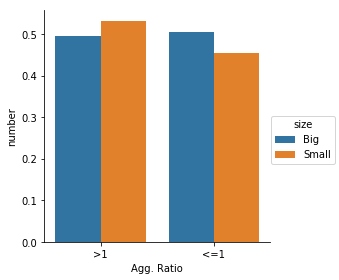

In [50]:
sns.factorplot(x='Agg. Ratio', y='number', hue='size', data=df4, kind='bar')